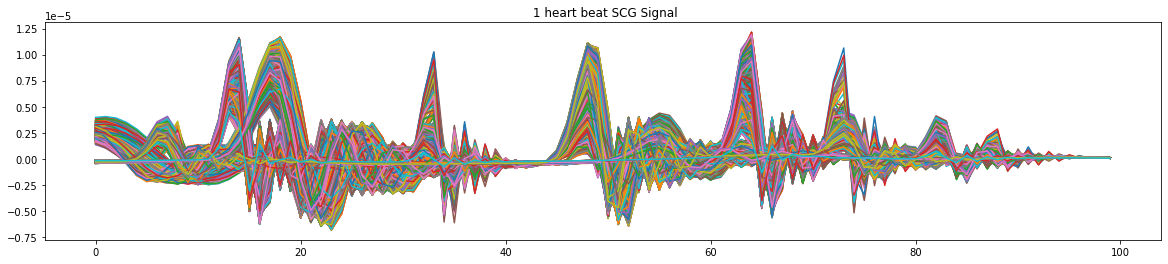

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/Users/racheldong/Desktop/Re_Ke/BedDot/simulator/df_train_SBP_singal_160.csv')
df

true = pd.read_csv("/Users/racheldong/Desktop/Re_Ke/BedDot/simulator/true_singal_160.csv")
true

data = df.values
data = data[:,90:190]
plt.figure(figsize=(20,4))
plt.plot(np.transpose(data))
plt.title(" 1 heart beat SCG Signal")
plt.show()

import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

def kernel_smooth(signals, sigma=2.0):
    """
    Apply a Gaussian kernel smooth to signals.
    
    Parameters:
    - signals: 2D numpy array, where each row is a signal.
    - sigma: Standard deviation for Gaussian kernel.
    
    Returns:
    - smoothed_signals: 2D numpy array with smoothed signals.
    """
    smoothed_signals = np.array([gaussian_filter1d(signal, sigma=sigma) for signal in signals])
    return smoothed_signals

# Extract signals and ensure it's a numpy array of dtype float
signals = df.iloc[:,90:190].to_numpy(dtype=float)

# Apply kernel smooth
smoothed_signals = kernel_smooth(signals, sigma=2.0)

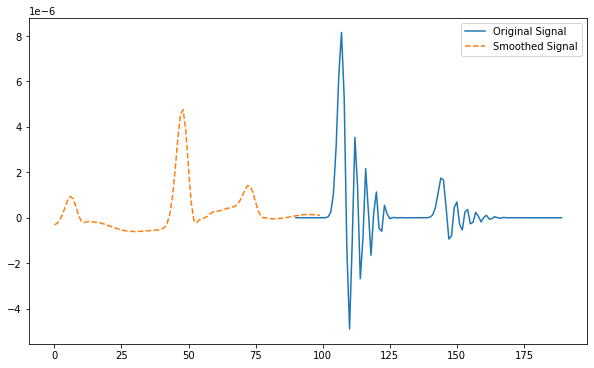

In [8]:
# Plot an example signal before and after smoothing
plt.figure(figsize=(10, 6))
plt.plot(true[90:190], label="Original Signal")
plt.plot(smoothed_signals[0], label="Smoothed Signal", linestyle="--")
plt.legend()
plt.show()

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

def align_beats(signals, height_threshold=0.5):
    """Align heartbeats based on their R-peaks."""
    aligned = []
    for signal in signals:
        peaks, _ = find_peaks(signal, height=height_threshold)
        if peaks.size == 0:  # No peaks found, use signal as is
            aligned.append(signal)
            continue
        # Align the signal at the most prominent peak
        r_peak = peaks[np.argmax(signal[peaks])]
        left = max(0, r_peak - 50)   # Adjust these values based on your data
        right = min(len(signal), r_peak + 50)
        aligned_signal = signal[left:right]
        aligned.append(aligned_signal)
    return aligned

# Assuming df has been loaded as before
signals = df.iloc[:, 90:190].to_numpy(dtype=float)

# Align the signals
aligned_signals = align_beats(signals)

# Apply kernel smooth
smoothed_signals = kernel_smooth(aligned_signals, sigma=2.0)

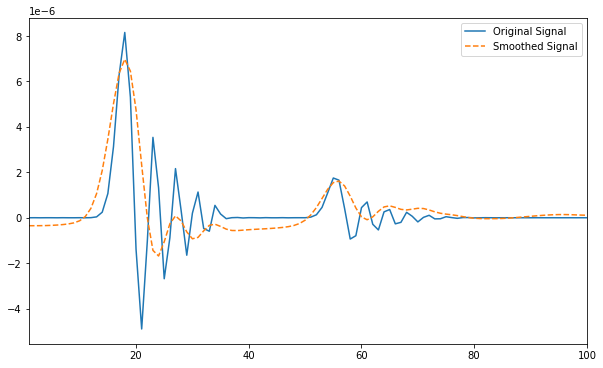

In [21]:
# Define the x-values for the signals
x_values = np.arange(1, 101)

true_values = true.iloc[:, 0]  # Get the first column as a Series


# Plot an example signal before and after smoothing
plt.figure(figsize=(10, 6))
plt.plot(x_values, true_values[90:190], label="Original Signal")
plt.plot(x_values, smoothed_signals[2], label="Smoothed Signal", linestyle="--")
plt.xlim(1, 100)  # Ensure x-axis limits are from 1 to 100
plt.legend()
plt.show()
